In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns 

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.describe()


,Inches,Ram,Price
count,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,59870.042910
std,1.426304,5.084665,37243.201786
min,10.100000,2.000000,9270.720000
25%,14.000000,4.000000,31914.720000
50%,15.600000,8.000000,52054.560000
75%,15.600000,8.000000,79274.246400
max,18.400000,64.000000,324954.720000


In [7]:
df.shape 

(1303, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 112.1+ KB


In [9]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float32')

In [10]:
df.columns 

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [11]:
df=df.drop_duplicates()

<AxesSubplot:xlabel='Price', ylabel='Density'>

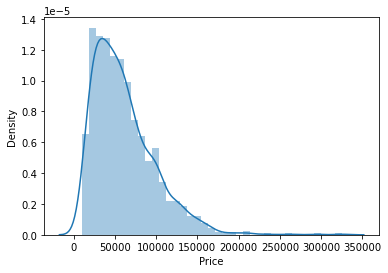

In [12]:
sns.distplot(df['Price'])

<AxesSubplot:>

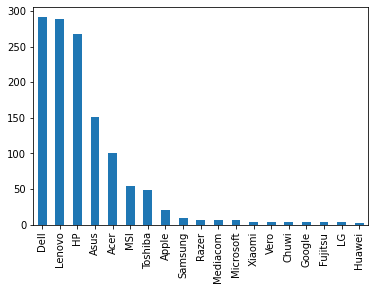

In [13]:
df['Company'].value_counts().plot(kind='bar')

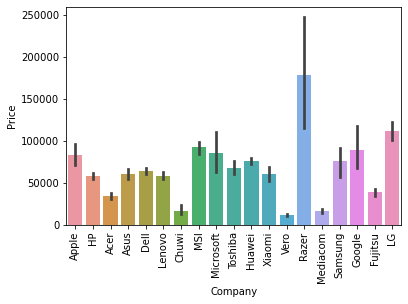

In [14]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

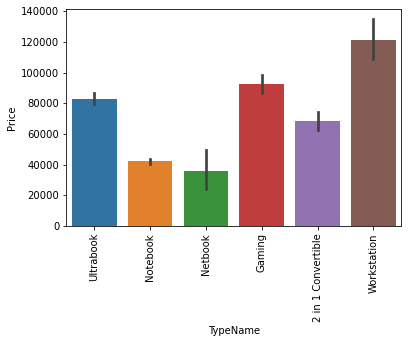

In [15]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

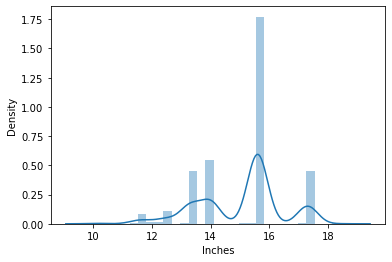

In [16]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

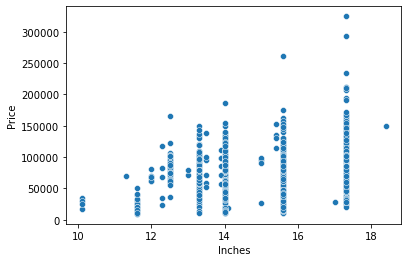

In [17]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [18]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [19]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [20]:
df['Touchscreen'].value_counts()

0    1086
1     188
Name: Touchscreen, dtype: int64

<AxesSubplot:>

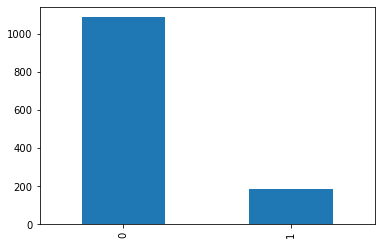

In [21]:
df['Touchscreen'].value_counts().plot(kind='bar')

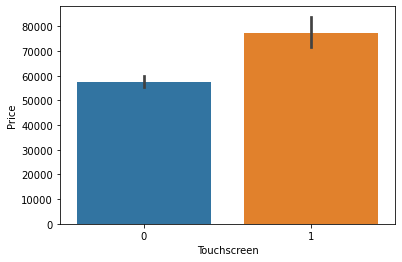

In [22]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])
 
plt.show()

In [23]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
 

<AxesSubplot:>

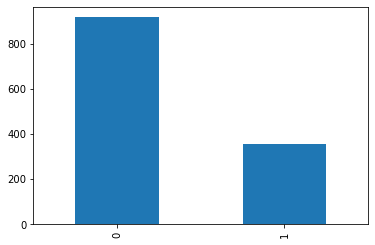

In [24]:
df['IPS'].value_counts().plot(kind='bar')

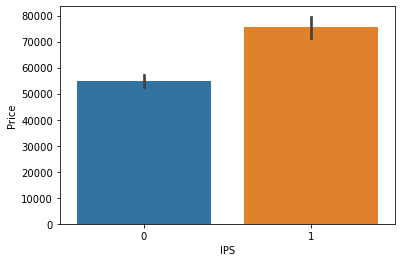

In [25]:
sns.barplot(x=df['IPS'], y=df['Price'])
 
plt.show()

In [26]:
df_new=df['ScreenResolution'].str.split('x', n=1, expand=True )

In [27]:
df .sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
472,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,128GB SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.0000,1,0
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0
998,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.7200,0,0
1020,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 6100U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.08,42410.3472,1,1
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400,0,1


In [28]:
df['X_res']=df_new[0]
df['Y_res']=df_new[1]

In [29]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df['X_res']=df['X_res'].astype(int)
df['Y_res']=df['X_res'].astype(int)

In [30]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.552074
Name: Price, dtype: float64

In [31]:
df['ppi']=(((df['X_res']**2)+ (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [32]:
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'], inplace=True)

In [33]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [34]:
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join( x.split()[0:3]))


In [35]:
def processor(text):
    if text =='Intel Core 17' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else : 
        if text.split()[0]=='Intel':
            return 'Other Intel Processor '
        else:
            return 'AMD processor'

In [36]:
df['Cpu manufacturer ']= df['Cpu name'].apply(processor)

In [37]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'IPS', 'ppi', 'Cpu name', 'Cpu manufacturer '],
      dtype='object')

In [38]:
df.drop(columns=['Cpu','Cpu name'],inplace=True)

In [39]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu manufacturer
854,Asus,Notebook,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.36,0,1,174.057054,Other Intel Processor
896,Dell,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,49497.12,0,0,174.057054,Other Intel Processor
442,Lenovo,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76137.12,0,1,217.223203,Intel Core i5
482,HP,Notebook,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.28,0,1,204.157146,Intel Core i5
269,Lenovo,Notebook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,46886.40,0,0,174.057054,Other Intel Processor


In [66]:
df['Weight'].unique ()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

<AxesSubplot:>

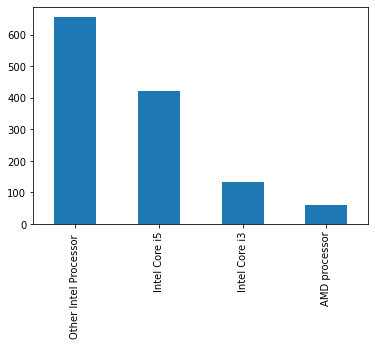

In [40]:
df['Cpu manufacturer '].value_counts().plot(kind='bar')

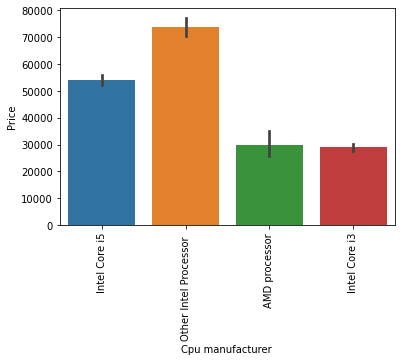

In [41]:
sns.barplot(x=df['Cpu manufacturer '], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
for col in df.columns:
    # Calculate the value counts for the current column
    vc = df[col].value_counts()
    # Print the value counts for the current column
    print('\n.............................\n')
    print(f'Value counts for column {col}:')
   
    print(vc)


.............................

Value counts for column Company:
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

.............................

Value counts for column TypeName:
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

.............................

Value counts for column Ram:
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

.............................

Value counts for column Memory:
256GB SSD                        412
1TB HDD                          215
500GB HDD           

In [43]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [44]:
#The first line removes any ".0" at the end of the string in the "Memory" column and converts the column to a string type.

#The next two lines remove the "GB" and "TB" units from the "Memory" column.

#The fourth line splits the "Memory" column at the "+" character, creating a new DataFrame "new" with two columns.

#The next four lines create four new columns in the original DataFrame based on the presence of certain strings in the "first" column of the "new" DataFrame.

#The next line removes any non-numeric characters from the "first" column of the "new" DataFrame.

#The next line fills any missing values in the "second" column of the "new" DataFrame with "0".

#The next four lines create four new columns in the original DataFrame based on the presence of certain strings in the "second" column of the "new" DataFrame.

#The next line removes any non-numeric characters from the "second" column of the "new" DataFrame.

#The next two lines convert the "first" and "second" columns to integer type.

#The next four lines calculate the total amount of HDD, SSD, Hybrid, and Flash Storage memory based on the values in the "first" and "second" columns and the presence of certain strings.

#The last line drops the columns that were created in steps 4 and 7, as they are no longer needed.

In [45]:
df.drop(columns=['Memory','Flash_Storage','Hybrid'], inplace=True, axis=1)

In [46]:
df.corr()['Price']

Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
ppi            0.471115
HDD           -0.098011
SSD            0.669957
Name: Price, dtype: float64

In [47]:
df['Gpu manufacturer']=df['Gpu'].apply(lambda x:x.split()[0])

In [48]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu manufacturer,HDD,SSD,Gpu manufacturer
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Other Intel Processor,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel


In [49]:
df=df[df['Gpu manufacturer']!= 'ARM']
df.drop(columns=['Gpu'],inplace=True)

In [50]:
df['Gpu manufacturer'].value_counts()

Intel     703
Nvidia    396
AMD       174
Name: Gpu manufacturer, dtype: int64

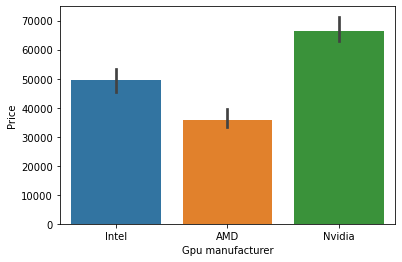

In [51]:
sns.barplot(x=df['Gpu manufacturer'], y=df['Price'],estimator=np.median )
#plt.xticks(rotation='45')
plt.show()

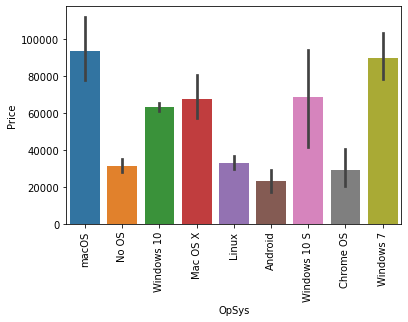

In [52]:
sns.barplot(x=df['OpSys'], y=df['Price'] )
plt.xticks(rotation='vertical')

plt.show()

In [53]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [54]:
def OS_cat(value):
    if value=='Windows 10' or value=='Windows 7' or value=='Windows 10 S':
        return 'Windows'
    elif value=='macOS' or value=='Mac OS X' :
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [55]:
df['OS']=df['OpSys'].apply(OS_cat)

In [56]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu manufacturer,HDD,SSD,Gpu manufacturer,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac


In [57]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'IPS', 'ppi', 'Cpu manufacturer ', 'HDD', 'SSD', 'Gpu manufacturer',
       'OS'],
      dtype='object')

In [58]:
df.drop(columns=['OpSys'],inplace=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

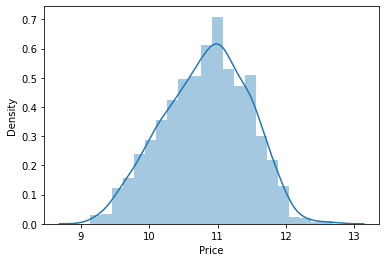

In [59]:
sns.distplot(np.log(df['Price']))

In [63]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu manufacturer,HDD,SSD,Gpu manufacturer,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,264.476303,Other Intel Processor,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel,Mac


In [61]:
df['Company'] = df['Company'].str.strip()

In [65]:
df.to_csv('clean_csv.csv')

In [64]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [62]:
------

SyntaxError: invalid syntax (3549499166.py, line 1)

In [ ]:
X=df.drop(columns='Price', axis=1)
Y=np.log(df['Price'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=34, train_size=0.8)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(x_train,y_train)

y_pred = pipe1.predict(x_test)

print (f'Train Accuracy - : {pipe1.score(x_train,y_train)*100:.3f}')
print (f'Test Accuracy - : {pipe1.score(x_test,y_test)*100:.3f}')
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth= 8, min_samples_leaf= 3, min_samples_split= 4, random_state=42)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(x_train,y_train)

y_pred = pipe2.predict(x_test)

print (f'Train Accuracy - : {pipe2.score(x_train,y_train)*100:.3f}')
print (f'Test Accuracy - : {pipe2.score(x_test,y_test)*100:.3f}')
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
 ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(x_train,y_train)

y_pred = pipe3.predict(x_test)

print (f'Train Accuracy - : {pipe3.score(x_train,y_train)*100:.3f}')
print (f'Test Accuracy - : {pipe3.score(x_test,y_test)*100:.3f}')
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe3,open('pipe.pkl','wb'))

In [ ]:
df

In [ ]:
pip show scikit-learn